In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
from sys import platform
if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/skagit/"
    output_string = "/home/maria/Documents/output/pied_piper/skagit/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/skagit/"

In [3]:
df = pd.read_csv("https://www.rmis.org/reports/CSV9481.txt")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)   

,record_code,format_version,submission_date,reporting_agency,release_agency,coordinator,tag_code_or_release_id,tag_type,first_sequential_number,last_sequential_number,related_group_type,related_group_id,species,run,brood_year,first_release_date,last_release_date,release_location_code,hatchery_location_code,stock_location_code,release_stage,rearing_type,study_type,release_strategy,avg_weight,avg_length,study_integrity,cwt_1st_mark,cwt_1st_mark_count,cwt_2nd_mark,cwt_2nd_mark_count,non_cwt_1st_mark,non_cwt_1st_mark_count,non_cwt_2nd_mark,non_cwt_2nd_mark_count,counting_method,tag_loss_rate,tag_loss_days,tag_loss_sample_size,tag_reused,comments,release_location_name,hatchery_location_name,stock_location_name,release_location_state,release_location_rmis_region,release_location_rmis_basin,record_origin,tagged_adclipped,tagged_unclipped,untagged_adclipped,untagged_unclipped,untagged_unknown
0,T,4.2,20231204,WDFW,WDFW,4,210677,0.0,NaN,NaN,NaN,NaN,1,2.0,2005,20060523,20060523,3F10208 030176 R,3F10208 031853AH,3F10208 030176 S,NaN,H,NaN,NaN,3.38,66.0,NaN,5000.0,200657.0,0.0,1641.0,5000.0,2872.0,NaN,NaN,NaN,0.0140,NaN,NaN,NaN,BO=W(WILD),SKAGIT R 03.0176,COUNTY LINE PONDS,SKAGIT R 03.0176,WA,SKAG,SKAGG,N,200657,1641,2872,0,0
1,N,4.2,20231204,WDFW,WDFW,4,!04P00111602,NaN,NaN,NaN,NaN,NaN,1,1.0,2016,20170602,20170602,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,NaN,VO,6.21,84445.0,NaN,NaN,NaN,NaN,NaN,5000.0,105786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,0,0,105786,0,0
2,T,4.2,20231204,WDFW,WDFW,4,211007,0.0,NaN,NaN,NaN,NaN,1,2.0,2011,20120608,20120612,3F10208 031853BR,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,VO,4.27,69.0,NaN,5000.0,187388.0,0.0,1908.0,5000.0,1527.0,NaN,NaN,NaN,0.0080,NaN,500.0,NaN,BO=MIXED(HxW) FISH MOVED TO CO.LINE POND 6/5/1...,CO LINE PD2 03.1853B,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,187388,1908,1527,0,0
3,T,4.2,20231204,WDFW,WDFW,4,638543,12.0,NaN,NaN,NaN,NaN,1,1.0,2022,20230825,20230825,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,P,FR,6.12,89.0,NaN,5000.0,99251.0,0.0,388.0,5000.0,1747.0,0.0,7.0,NaN,0.0173,NaN,519.0,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,99251,388,1747,7,0
4,T,4.2,20231204,WDFW,WDFW,4,630950,11.0,NaN,NaN,D,4.200200e+12,2,NaN,2000,20020516,20020517,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,26.91,128.0,NaN,5000.0,10582.0,0.0,63.0,5000.0,260.0,0.0,2.0,NaN,0.0240,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,10582,63,260,2,0
5,T,4.2,20231204,WDFW,WDFW,4,633867,12.0,NaN,NaN,NaN,NaN,1,1.0,2006,20070615,20070615,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,6.04,81.0,NaN,5000.0,254739.0,0.0,946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,254739,946,0,0,0
6,T,4.2,20231204,WDFW,WDFW,4,632065,13.0,NaN,NaN,D,4.200400e+12,2,NaN,2002,20040601,20040607,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,25.62,135.0,NaN,5000.0,29560.0,0.0,1040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20% LOSS FROM FLOOD,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,29560,1040,0,0,0
7,T,4.2,20231204,WDFW,WDFW,4,638010,12.0,NaN,NaN,NaN,NaN,1,1.0,2020,20210926,20210926,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,P,FR,9.25,89.0,NaN,5000.0,45582.0,0.0,1284.0,5000.0,201.0,0.0,6.0,NaN,0.0044,NaN,914.0,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,45582,1284,201,6,0
8,T,4.2,20231204,WDFW,WDFW,4,630896,12.0,NaN,NaN,NaN,NaN,1,1.0,2001,20020604,20020605,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,6.04,81.0,NaN,5000.0,242721.0,NaN,NaN,5000.0,10641.0,NaN,NaN,NaN,0.0420,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,242721,0,10641,0,0
9,T,4.2,20231204,WDFW,WDFW,4,630694,12.0,NaN,NaN,D,4.200200e+12,1,1.0,2000,

In [4]:
df['first_release_date'] =  pd.to_datetime(df['first_release_date'], format='%Y%m%d')
df['last_release_date'] =  pd.to_datetime(df['last_release_date'], format='%Y%m%d')
df['total'] = (df['tagged_adclipped'] + df['tagged_unclipped'] + df['untagged_adclipped'] + 
               df['untagged_unclipped'] + df['untagged_unknown'])
df['unclipped'] = (df['tagged_unclipped'] + df['untagged_unclipped'] + df['untagged_unknown'])
df['prop_unclipped'] = df['unclipped']/df['total']
df['unmarked'] = (df['untagged_unclipped']+ df['untagged_unknown'])
df['age'] = df['first_release_date'].dt.year - df['brood_year']
df['prop_untagged_unclipped'] = (df['untagged_unclipped']+ df['untagged_unknown'])/df['total']

In [5]:
subset_df = df[(df['first_release_date'].dt.year >= 2010) & (df['first_release_date'].dt.year <= 2022)]
coho_df = subset_df[subset_df['species']==2]
coho_age_2 = coho_df[coho_df['age']==2]

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(coho_age_2[['first_release_date','hatchery_location_name','prop_untagged_unclipped','total', 'age','unmarked']]) 

,first_release_date,hatchery_location_name,prop_untagged_unclipped,total,age,unmarked
20,2020-04-29,BAKER LK HATCHERY,0.008591,23280,2,200
26,2014-03-19,BAKER LK HATCHERY,0.040024,3298,2,132
32,2022-05-01,MARBLEMOUNT HATCHERY,0.005199,438911,2,2282
33,2022-05-01,MARBLEMOUNT HATCHERY,1.000000,2,2,2
36,2012-05-09,BAKER LK HATCHERY,0.000000,43287,2,0
48,2016-04-27,BAKER LK HATCHERY,0.019992,53071,2,1061
51,2014-05-01,BAKER LK HATCHERY,0.040007,65964,2,2639
57,2013-04-19,BAKER LK HATCHERY,0.039795,1558,2,62
60,2012-04-11,BAKER LK HATCHERY,0.000000,5157,2,0
61,2012-04-12,BAKER LK HATCHERY,0.000000,5162,2,0


In [7]:
#aggregate based on date

coho_age_2_agg = coho_age_2.groupby(['first_release_date','age']).agg({'unmarked':'sum', 'total':'sum'}).reset_index()
coho_age_2_agg['prop_unmarked'] = coho_age_2_agg['unmarked']/coho_age_2_agg['total']
coho_age_2_agg
#only keep release date, total, unmarked and prop_unmarked, and then rename to add coho to the colnames

coho_age_2_agg = coho_age_2_agg.drop(['age'],axis = 1)
coho_age_2_agg = coho_age_2_agg.rename(columns={'first_release_date':'Date','unmarked':'unmarked_coho1','total':'total_coho1_release',
                      'prop_unmarked':'prop_unmarked_coho1'})



In [8]:
#do the same  for chinook

chinook_df = subset_df[subset_df['species']==1]
chinook0_df = chinook_df[chinook_df['age']==1]

#aggregate based on date

chinook0_agg = chinook0_df.groupby(['first_release_date','age']).agg({'unmarked':'sum', 'total':'sum'}).reset_index()
chinook0_agg['prop_unmarked'] = chinook0_agg['unmarked']/chinook0_agg['total']
chinook0_agg
chinook0_agg = chinook0_agg.drop(['age'],axis = 1)
chinook0_agg= chinook0_agg.rename(columns={'first_release_date':'Date','unmarked':'unmarked_chinook0',
                                           'total':'total_chinook0_release',
                      'prop_unmarked':'prop_unmarked_chinook0'})

chinook0_agg
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(chinook0_df[['first_release_date','hatchery_location_name','prop_untagged_unclipped','total', 'age','unmarked']]) 
    
    

,Date,unmarked_chinook0,total_chinook0_release,prop_unmarked_chinook0
0,2010-05-28,0,211196,0.000000
1,2010-06-07,0,268617,0.000000
2,2011-06-07,0,184894,0.000000
3,2011-06-13,0,253841,0.000000
4,2012-06-08,0,190823,0.000000
5,2012-06-15,1177,475326,0.002476
6,2013-06-10,1218,580985,0.002096
7,2013-06-19,0,198597,0.000000
8,2014-06-12,333,577524,0.000577
9,2014-06-25,0,185764,0.000000


In [9]:
#merge with skagit dataframe

#reading skagit data
df_skagit_unagg = pd.read_csv(data_string + "skagit_2010-2022_w_covariates.csv")

#then aggregate across daytime_category and trap in the skagit data

df_skagit = df_skagit_unagg.groupby(['Date','doy','year']).agg({'chinook0_wild_num':'sum','chinook0_hatchery_num':'sum',
                                                    'coho1_wild_num':'sum','coho1_hatchery_num':'sum',
                                                    'In':'sum'}).reset_index()

df_skagit['Date'] = pd.to_datetime(df_skagit['Date'])
df_merged = df_skagit.merge(chinook0_agg, on = 'Date', how = 'left')
df_merged = df_merged.merge(coho_age_2_agg, on = 'Date', how = 'left')
df_merged.columns

Index(['Date', 'doy', 'year', 'chinook0_wild_num', 'chinook0_hatchery_num',
       'coho1_wild_num', 'coho1_hatchery_num', 'In', 'unmarked_chinook0',
       'total_chinook0_release', 'prop_unmarked_chinook0', 'unmarked_coho1',
       'total_coho1_release', 'prop_unmarked_coho1'],
      dtype='object')

In [11]:
df_merged.to_csv(output_string+'skagit_2010-2022_rmis.csv')

In [59]:
coho1_list = df_merged['Date'][~np.isnan(df_merged['total_coho1_release'])]
chinook0_list = df_merged['Date'][~np.isnan(df_merged['total_chinook0_release'])]

In [60]:
#find max hatchery between release and 50 days later
chinook0_hatchery_list = []
chinook0_wild_list = []
chinook0_prop_wild_list = []
fig = plt.figure(figsize=(15,10))
for i in chinook0_list.index:
    print(i)
    if len(df_merged['chinook0_hatchery_num']) < i+50:
        length_dataframe =  len(df_merged['chinook0_hatchery_num'])
    else:
        length_dataframe = i+50
    print(length_dataframe)
    if np.isnan(np.max(df_merged['chinook0_hatchery_num'][i:length_dataframe])):
        continue
    else:
        index = df_merged['chinook0_hatchery_num'][df_merged['chinook0_hatchery_num']==
                                                np.max(df_merged['chinook0_hatchery_num'][i:length_dataframe])].index[0]
    
    
    chinook0_hatchery_list.append(df_merged['chinook0_hatchery_num'][index])
    chinook0_wild_list.append(df_merged['chinook0_wild_num'][index])
    chinook0_prop_wild_list.append(df_merged['chinook0_wild_num'][index]/(
        df_merged['chinook0_hatchery_num'][index]+df_merged['chinook0_wild_num'][index]))

128
178
138
188
318
368
325
375
491
541
500
550
664
714
677
727
825
875
835
885
1003
1053
1011
1061
1179
1229
1184
1234
1355
1405
1379
1429
1526
1576
1546
1596
1652
1702
1689
1739
1692
1742
1802
1852
1841
1891
1843
1893
1868
1918
1981
2031
2011
2054
2040
2054


<Figure size 1080x720 with 0 Axes>

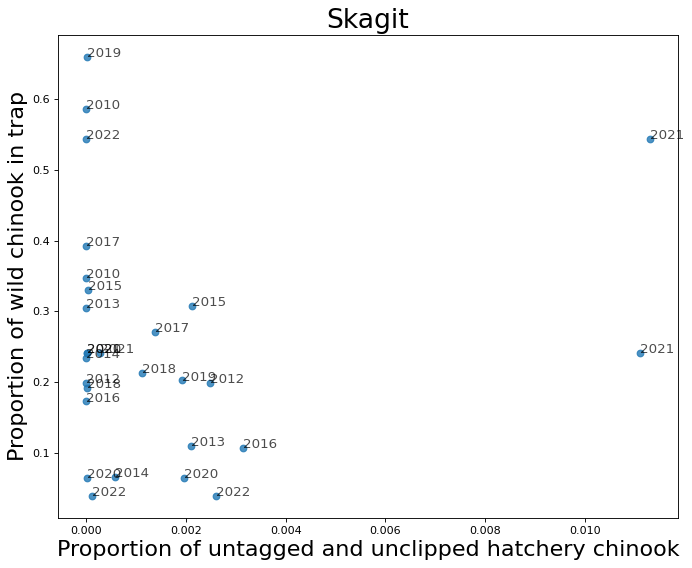

In [61]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(df_merged['prop_unmarked_chinook0'][chinook0_list.index], chinook0_prop_wild_list, alpha = 0.8)
plt.xlabel('Proportion of untagged and unclipped hatchery chinook', fontsize =20)
plt.ylabel('Proportion of wild chinook in trap', fontsize = 20)
plt.title('Skagit', fontsize = 24)
for i in range(len(chinook0_list.index)):
    if np.isnan(df_merged['year'][chinook0_list.index[i]]):
        print("is nan")
        year = df_merged['Date'].dt.year[chinook0_list.index[i]]
    else:
        year = df_merged['year'][chinook0_list.index[i]]
#     print(year)
    plt.annotate(int(year),(
    df_merged['prop_unmarked_chinook0'][chinook0_list.index[i]], chinook0_prop_wild_list[i]), fontsize = 12, alpha = 0.7)
plt.savefig(output_string + 'proportion_unmarked_chinook.jpeg')

In [62]:
#find max hatchery between release and 50 days later
coho1_hatchery_list = []
coho1_wild_list = []
coho1_prop_wild_list = []
fig = plt.figure(figsize=(15,10))
for i in coho1_list.index:
    print(i)
    if len(df_merged['coho1_hatchery_num']) < i+50:
        length_dataframe =  len(df_merged['coho1_hatchery_num'])
    else:
        length_dataframe = i+50
    print(length_dataframe)
    if np.isnan(np.max(df_merged['coho1_hatchery_num'][i:length_dataframe])):
        continue
    else:
        index = df_merged['coho1_hatchery_num'][df_merged['coho1_hatchery_num']==
                                                np.max(df_merged['coho1_hatchery_num'][i:length_dataframe])].index[0]
    
    
    coho1_hatchery_list.append(df_merged['coho1_hatchery_num'][index])
    coho1_wild_list.append(df_merged['coho1_wild_num'][index])
    coho1_prop_wild_list.append(df_merged['coho1_wild_num'][index]/(
        df_merged['coho1_hatchery_num'][index]+df_merged['coho1_wild_num'][index]))

22
72
113
163
191
241
231
281
260
310
261
311
280
330
288
338
429
479
430
480
435
485
439
489
465
515
579
629
621
671
622
672
634
684
757
807
764
814
798
848
813
863
967
1017
972
1022
1149
1199
1154
1204
1324
1374
1325
1375
1492
1542
1494
1544
1645
1695
1647
1697
1793
1843
1806
1856
1980
2030


<ipython-input-62-088a4487e60c>:22: RuntimeWarning: invalid value encountered in double_scalars
  coho1_prop_wild_list.append(df_merged['coho1_wild_num'][index]/(


<Figure size 1080x720 with 0 Axes>

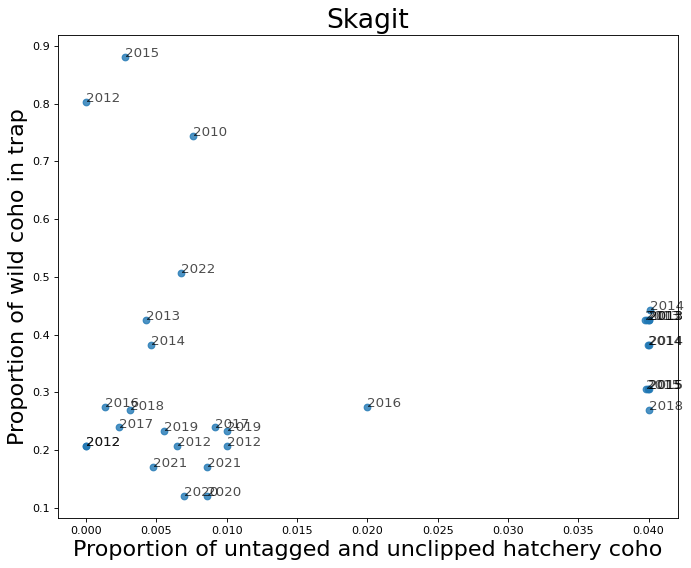

In [63]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(df_merged['prop_unmarked_coho1'][coho1_list.index], coho1_prop_wild_list, alpha = 0.8)
plt.xlabel('Proportion of untagged and unclipped hatchery coho', fontsize =20)
plt.ylabel('Proportion of wild coho in trap', fontsize = 20)
plt.title('Skagit', fontsize = 24)
for i in range(len(coho1_list.index)):
    if np.isnan(df_merged['year'][coho1_list.index[i]]):
        print("is nan")
        year = df_merged['Date'].dt.year[coho1_list.index[i]]
    else:
        year = df_merged['year'][coho1_list.index[i]]
#     print(year)
    plt.annotate(int(year),(
    df_merged['prop_unmarked_coho1'][coho1_list.index[i]], coho1_prop_wild_list[i]), fontsize = 12, alpha = 0.7)
plt.savefig(output_string + 'proportion_unmarked_coho.jpeg')

In [28]:
#trying new file - https://www.rmis.org/reports/CSV4392.txt

df2 = pd.read_csv("https://www.rmis.org/reports/CSV4392.txt")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df2)   

,record_code,format_version,submission_date,reporting_agency,release_agency,coordinator,tag_code_or_release_id,tag_type,first_sequential_number,last_sequential_number,related_group_type,related_group_id,species,run,brood_year,first_release_date,last_release_date,release_location_code,hatchery_location_code,stock_location_code,release_stage,rearing_type,study_type,release_strategy,avg_weight,avg_length,study_integrity,cwt_1st_mark,cwt_1st_mark_count,cwt_2nd_mark,cwt_2nd_mark_count,non_cwt_1st_mark,non_cwt_1st_mark_count,non_cwt_2nd_mark,non_cwt_2nd_mark_count,counting_method,tag_loss_rate,tag_loss_days,tag_loss_sample_size,tag_reused,comments,release_location_name,hatchery_location_name,stock_location_name,release_location_state,release_location_rmis_region,release_location_rmis_basin,record_origin,tagged_adclipped,tagged_unclipped,untagged_adclipped,untagged_unclipped,untagged_unknown
0,N,4.2,20231204,WDFW,WDFW,4,!04P00111602,NaN,NaN,NaN,NaN,NaN,1,1.0,2016,20170602,20170602,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,NaN,VO,6.21,84445.0,NaN,NaN,NaN,NaN,NaN,5000.0,105786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,0,0,105786,0,0
1,T,4.2,20231204,WDFW,WDFW,4,631017,0.0,NaN,NaN,D,4.200000e+12,1,1.0,1998,20000306,20000313,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,41.23,151.0,NaN,5000.0,65619.0,NaN,NaN,5000.0,1476.0,NaN,NaN,NaN,0.0220,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,65619,0,1476,0,0
2,T,4.2,20231204,WDFW,WDFW,4,630950,11.0,NaN,NaN,D,4.200200e+12,2,NaN,2000,20020516,20020517,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,26.91,128.0,NaN,5000.0,10582.0,0.0,63.0,5000.0,260.0,0.0,2.0,NaN,0.0240,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,10582,63,260,2,0
3,T,4.2,20231204,WDFW,WDFW,4,638543,12.0,NaN,NaN,NaN,NaN,1,1.0,2022,20230825,20230825,3F10208 031411 R,3F10208 031421 H,3F10208 031421 S02,NaN,H,P,FR,6.12,89.0,NaN,5000.0,99251.0,0.0,388.0,5000.0,1747.0,0.0,7.0,NaN,0.0173,NaN,519.0,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,MARBLEMOUNT HATCH,WA,SKAG,UPSK,N,99251,388,1747,7,0
4,T,4.2,20231204,WDFW,WDFW,4,210745,0.0,NaN,NaN,NaN,NaN,1,3.0,2006,20070611,20070611,3F10208 030435 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,4.27,73.0,NaN,5000.0,161018.0,0.0,798.0,5000.0,956.0,NaN,NaN,NaN,0.0059,NaN,NaN,NaN,BO=W(WILD),BAKER R 03.0435,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,SKAGG,N,161018,798,956,0,0
5,T,4.2,20231204,WDFW,WDFW,4,210677,0.0,NaN,NaN,NaN,NaN,1,2.0,2005,20060523,20060523,3F10208 030176 R,3F10208 031853AH,3F10208 030176 S,NaN,H,NaN,NaN,3.38,66.0,NaN,5000.0,200657.0,0.0,1641.0,5000.0,2872.0,NaN,NaN,NaN,0.0140,NaN,NaN,NaN,BO=W(WILD),SKAGIT R 03.0176,COUNTY LINE PONDS,SKAGIT R 03.0176,WA,SKAG,SKAGG,N,200657,1641,2872,0,0
6,T,4.2,20231204,WDFW,WDFW,4,633867,12.0,NaN,NaN,NaN,NaN,1,1.0,2006,20070615,20070615,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,NaN,6.04,81.0,NaN,5000.0,254739.0,0.0,946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,254739,946,0,0,0
7,T,4.2,20231204,WDFW,WDFW,4,632065,13.0,NaN,NaN,D,4.200400e+12,2,NaN,2002,20040601,20040607,3F10208 031411 R,3F10208 031421 H,3F10208 030176 S,Y,H,NaN,NaN,25.62,135.0,NaN,5000.0,29560.0,0.0,1040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20% LOSS FROM FLOOD,CASCADE R 03.1411,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,29560,1040,0,0,0
8,T,4.2,20231204,WDFW,WDFW,4,211007,0.0,NaN,NaN,NaN,NaN,1,2.0,2011,20120608,20120612,3F10208 031853BR,3F10208 031421 H,3F10208 030176 S,NaN,H,NaN,VO,4.27,69.0,NaN,5000.0,187388.0,0.0,1908.0,5000.0,1527.0,NaN,NaN,NaN,0.0080,NaN,500.0,NaN,BO=MIXED(HxW) FISH MOVED TO CO.LINE POND 6/5/1...,CO LINE PD2 03.1853B,MARBLEMOUNT HATCHERY,SKAGIT R 03.0176,WA,SKAG,UPSK,N,187388,1908,1527,0,0
9,T,4.2,20231204,WDFW,WDFW,4,638010,12.0,NaN,NaN,NaN,NaN,1,1.0,2020,20